In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.request import URLError

In [7]:
try : 
    html = urlopen('https://www.koreabaseball.com/Record/Player/HitterBasic/Basic1.aspx')
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [8]:
soup


<!DOCTYPE html>

<html lang="ko">
<head><title>
	기록실 | 기록 | KBO
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/javascript" http-equiv="Content-Script-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/><meta content="IE=edge, Chrome" http-equiv="X-UA-Compatible"/><meta content="KBO" name="title"/><meta content="스포츠투아이" name="author"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" name="keywords"/><meta content="width=1200" name="viewport"/><meta content="website" property="og:type"/><meta content="KBO 홈페이지" property="og:title"/><meta content="KBO, 한국야구위원회, 프로야구, KBO 리그, 퓨처스리그, 프로야구순위, 프로야구 일정" property="og:description"/><meta content="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/open_graph_kbo.png" property="og:image"/><meta content="//www.koreabaseball.com/" property="og:url"/>
<link href="//lgcxydabfbch3774324.cdn.ntruss.com/KBO_IMAGE/KBOHome/resources/images/common/fa

In [9]:
# first p tag
soup.p

<p>(사)한국야구위원회</p>

In [10]:
# first a tag
soup.a

<a href="/Member/Login.aspx">로그인</a>

In [14]:
table = soup.find('table', {'class' : 'tData01 tt'})
table

<table cellpadding="0" cellspacing="0" class="tData01 tt" summary="선수 기본기록으로 경기,타석,타수,득점,안타,2루타, 3루타 등을 표시합니다">
<colgroup>
<col width="50"/>
<col width="80"/>
<col width="50"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="70"/>
<col width="60"/>
<col width="60"/>
</colgroup>
<thead>
<tr>
<th>순위</th>
<th>선수명</th>
<th>팀명</th>
<th><a href="javascript:sort('HRA_RT');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타율">AVG</a></th>
<th><a href="javascript:sort('GAME_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="경기">G</a></th>
<th><a href="javascript:sort('PA_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타석">PA</a></th>
<th><a href="javascript:sort('AB_CN');" onmouseenter="tooltip(this)" onmouseout="hideTip()" title="타수">AB</a></th>
<th><a href="javascript:sort('RUN_CN');" onmouseenter="tooltip(t

In [42]:
# 선수명, AVG, H, HR, RBI --> list

baseball = []

for tr in table.find_all('tr') :
    #print(tr)
    tds = tr.find_all('td')
    for td in tds :
        if td.find('a') :
            #print(td.find('a').text)
            baseball.append([td.find('a').text, tds[3].text, tds[8].text, tds[11].text, tds[13].text])

baseball

[['최형우', '0.354', '185', '28', '115'],
 ['손아섭', '0.352', '190', '11', '85'],
 ['로하스', '0.349', '192', '47', '135'],
 ['박민우', '0.345', '161', '8', '63'],
 ['페르난데스', '0.340', '199', '21', '105'],
 ['이정후', '0.333', '181', '15', '101'],
 ['허경민', '0.332', '145', '7', '58'],
 ['김현수', '0.331', '181', '22', '119'],
 ['강백호', '0.330', '165', '23', '89'],
 ['양의지', '0.328', '151', '33', '124'],
 ['나성범', '0.324', '170', '34', '112'],
 ['황재균', '0.312', '169', '21', '97'],
 ['김동엽', '0.312', '129', '20', '74'],
 ['오재일', '0.312', '147', '16', '89'],
 ['구자욱', '0.307', '137', '15', '78'],
 ['최주환', '0.306', '156', '16', '88'],
 ['터커', '0.306', '166', '32', '113'],
 ['박석민', '0.306', '109', '14', '63'],
 ['이명기', '0.306', '146', '2', '45'],
 ['김하성', '0.306', '163', '30', '109'],
 ['김상수', '0.304', '123', '5', '47'],
 ['박건우', '0.304', '148', '14', '70'],
 ['오지환', '0.300', '158', '10', '71'],
 ['정수빈', '0.298', '146', '5', '59'],
 ['조용호', '0.296', '121', '0', '32'],
 ['정훈', '0.295', '121', '11', '58'],
 ['채은성', 

In [60]:
# csv 파일 저장

with open('baseball.csv', 'w', encoding='utf-8') as file :
    for base in baseball :
        file.write('{},{},{},{},{}\n'.format(base[0],base[1],base[2],base[3],base[4]))
print('file-save')

file-save


In [66]:
import numpy as np
import pandas as pd

baseball_data = pd.read_csv('./baseball.csv', header=None)
print(type(baseball_data))
baseball_data.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105


In [76]:
baseball_data.rename(columns = {0 : 'name', 1 : 'AVG', 2 : 'H', 3 : 'HR', 4 : 'RBI'}, inplace = True)
baseball_data.head()

,name,AVG,H,HR,RBI
0,최형우,0.354,185,28,115
1,손아섭,0.352,190,11,85
2,로하스,0.349,192,47,135
3,박민우,0.345,161,8,63
4,페르난데스,0.340,199,21,105


In [77]:
# DataFrame csv저장

baseball_data.to_csv('baseball.csv', mode='w', encoding='utf-8')

In [78]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

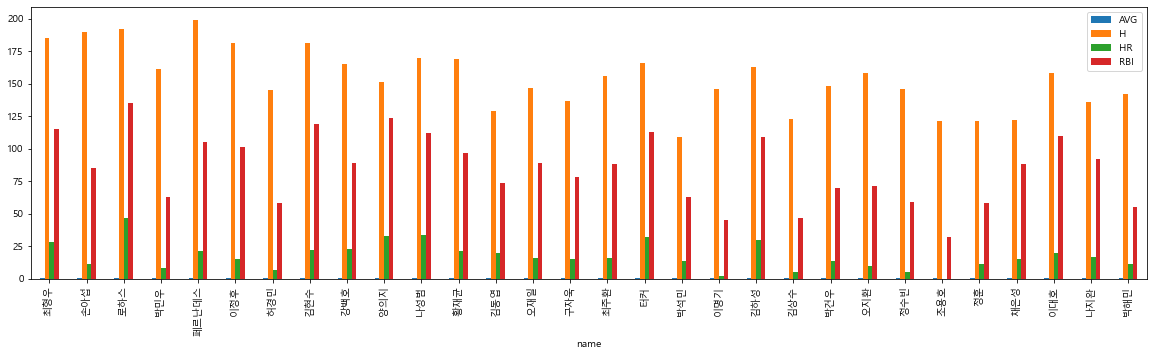

<function matplotlib.pyplot.close(fig=None)>

In [94]:
# 시각화
fig = plt.figure()

baseball_data.plot.bar(x='name', figsize=(20,5))

plt.show()
plt.close

In [69]:
# DB 생성

import pymongo as mongo
conn = mongo.MongoClient()

baseballDB = conn.baseballDB
baseballDB

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB')

In [70]:
# collection 생성

baseballCollection = baseballDB['baseball']
baseballCollection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'baseballDB'), 'baseball')

In [71]:
# insert

baseball_info_list = []

for obj in baseball :
    baseball_info_list.append({
        'name' : obj[0],
        'AVG' : obj[1],
        'H' : obj[2],
        'HR' : obj[3],
        'RBI' : obj[4],
    })
    
baseball_info_list

[{'name': '최형우', 'AVG': '0.354', 'H': '185', 'HR': '28', 'RBI': '115'},
 {'name': '손아섭', 'AVG': '0.352', 'H': '190', 'HR': '11', 'RBI': '85'},
 {'name': '로하스', 'AVG': '0.349', 'H': '192', 'HR': '47', 'RBI': '135'},
 {'name': '박민우', 'AVG': '0.345', 'H': '161', 'HR': '8', 'RBI': '63'},
 {'name': '페르난데스', 'AVG': '0.340', 'H': '199', 'HR': '21', 'RBI': '105'},
 {'name': '이정후', 'AVG': '0.333', 'H': '181', 'HR': '15', 'RBI': '101'},
 {'name': '허경민', 'AVG': '0.332', 'H': '145', 'HR': '7', 'RBI': '58'},
 {'name': '김현수', 'AVG': '0.331', 'H': '181', 'HR': '22', 'RBI': '119'},
 {'name': '강백호', 'AVG': '0.330', 'H': '165', 'HR': '23', 'RBI': '89'},
 {'name': '양의지', 'AVG': '0.328', 'H': '151', 'HR': '33', 'RBI': '124'},
 {'name': '나성범', 'AVG': '0.324', 'H': '170', 'HR': '34', 'RBI': '112'},
 {'name': '황재균', 'AVG': '0.312', 'H': '169', 'HR': '21', 'RBI': '97'},
 {'name': '김동엽', 'AVG': '0.312', 'H': '129', 'HR': '20', 'RBI': '74'},
 {'name': '오재일', 'AVG': '0.312', 'H': '147', 'HR': '16', 'RBI': '89'},

In [72]:
baseballCollection.insert_many(baseball_info_list)

In [73]:
baseballCollection.find_one()

{'_id': ObjectId('60482de248f6c2d278caf71a'),
 'name': '최형우',
 'AVG': '0.354',
 'H': '185',
 'HR': '28',
 'RBI': '115'}